In [2]:
include("runexp.jl");

In [3]:
function generateArmRewardModel(nArms::Int64)
    
    AM = Array(ArmModel, nArms)
    
    for i = 1:nArms
        AM[i] = ArmModel(0.01, 0.01, -50., 1., 1 / 2, 1 / (2 * (1 / 5. ^ 2)), -500., -1000., 1., 1 / 2, 1 / (2 * (1 / 1.^2)))
    end
    
    return AM
end;

# Stochastic Two-Armed Bandit

Arm 1: Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -30.0, -70.0

Best arm: 1



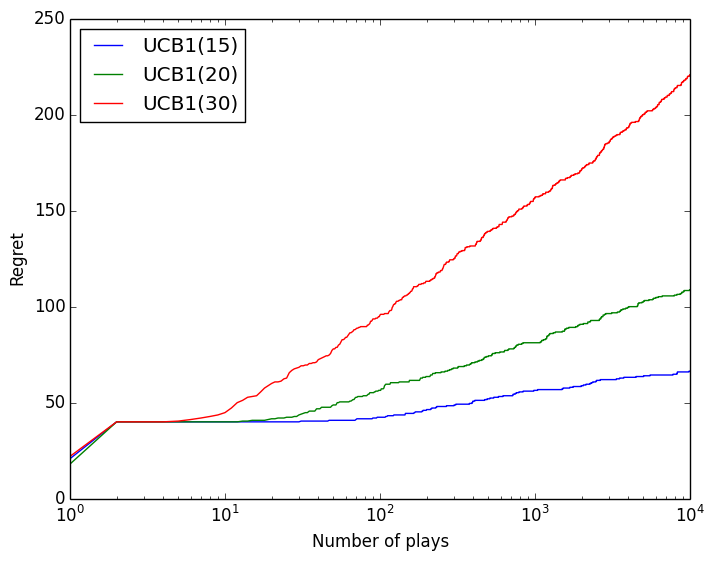

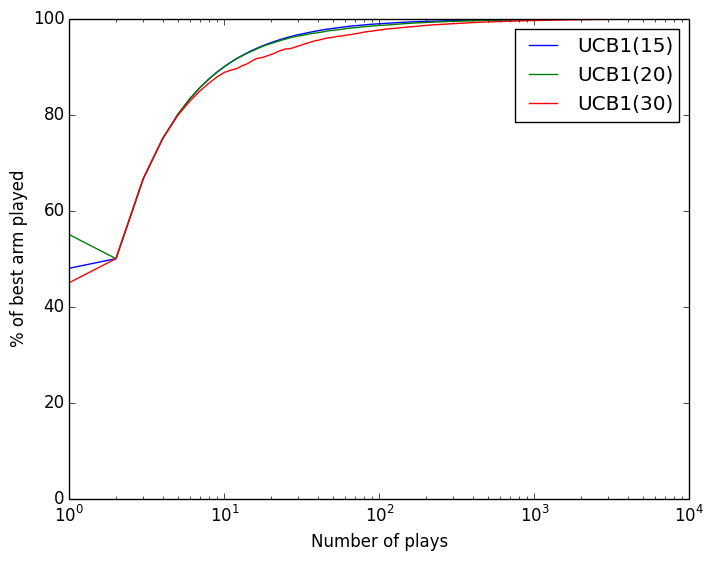

In [3]:
plotExpParam([RareDist(0., -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], :UCB1, [15, 20, 30]);

Arm 1: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -127.0, -163.0

Best arm: 1



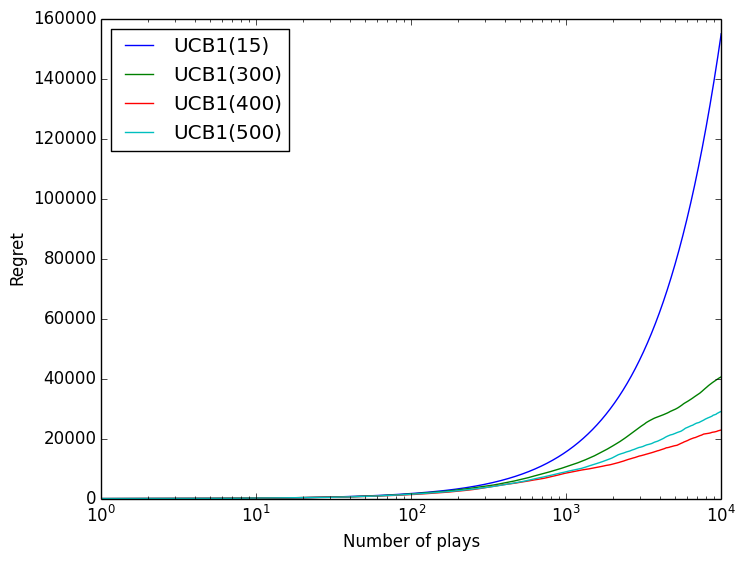

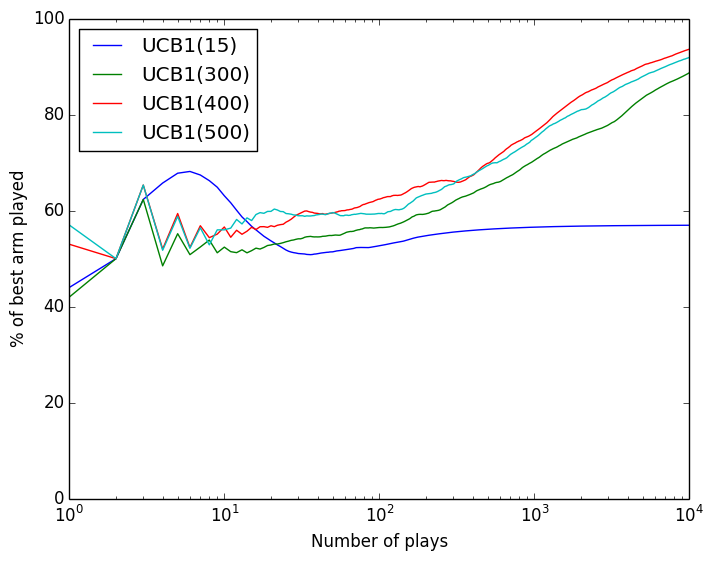

In [4]:
plotExpParam([RareDist(0.1, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0.1, -1000., Truncated(Normal(-70, 10), -120, -20))], :UCB1, [15, 300, 400, 500]);

Arm 1: Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -30.0, -70.0

Best arm: 1



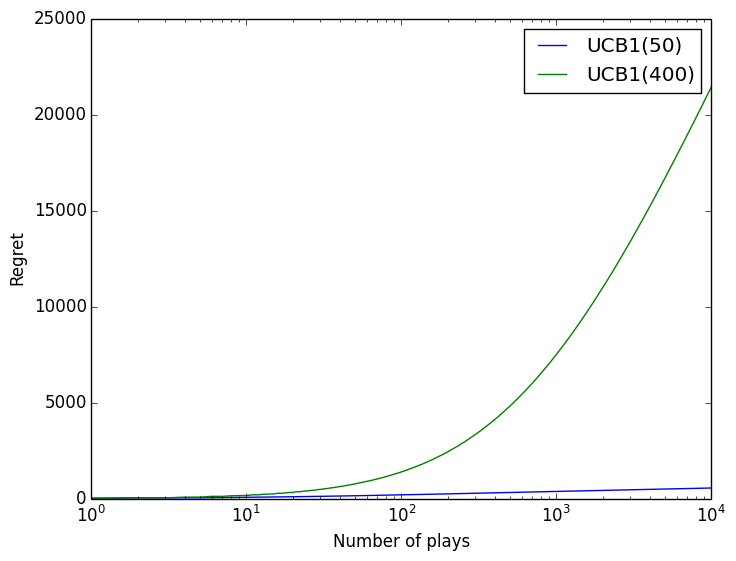

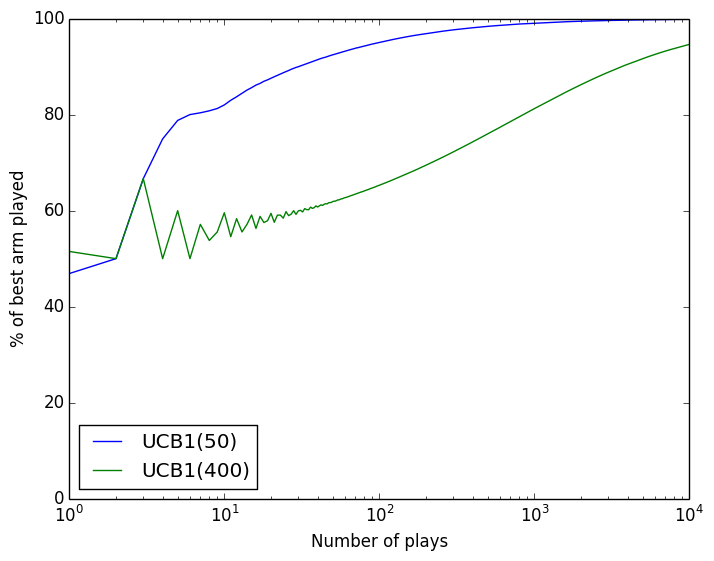

In [21]:
plotExpPolicy([RareDist(0., -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 50], Any[:UCB1, 400]], N = 1000, bSave = true);

Arm 1: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -127.0, -163.0

Best arm: 1



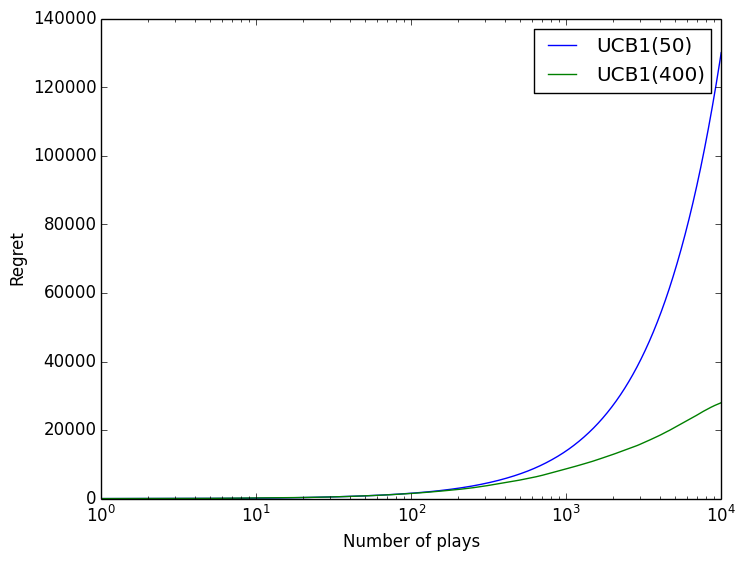

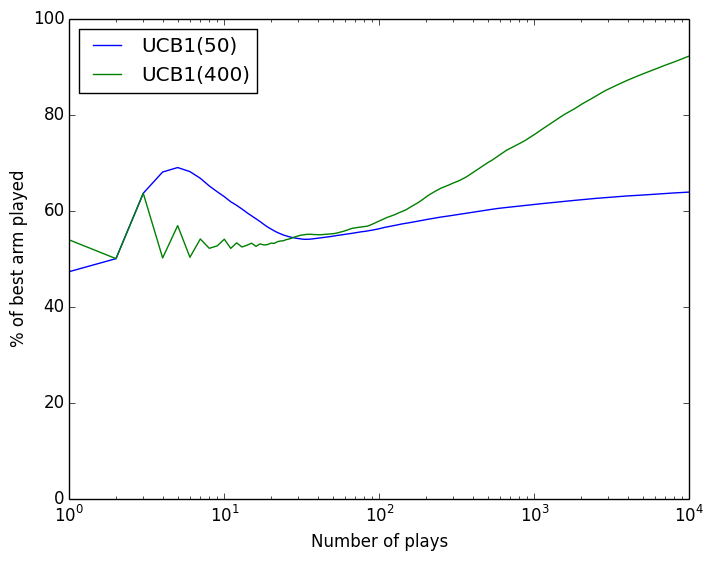

In [31]:
plotExpPolicy([RareDist(0.1, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0.1, -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 50], Any[:UCB1, 400]], N = 1000, bSave = true);

Arm 1: Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -30.0, -70.0

Best arm: 1



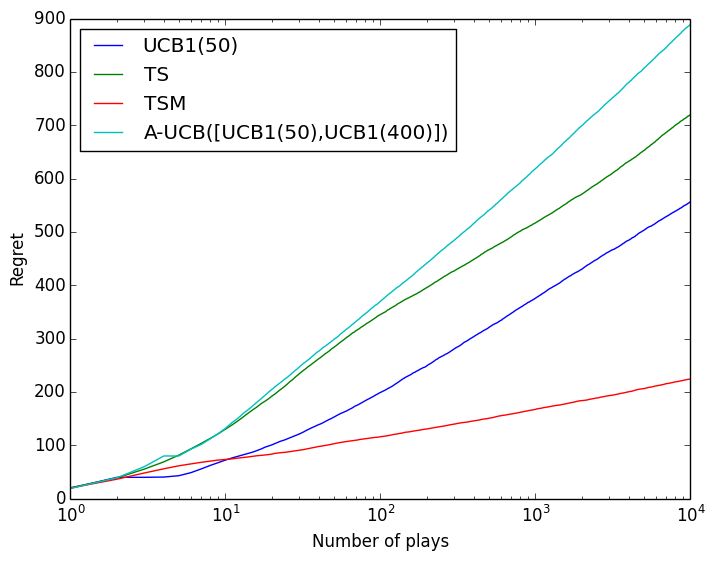

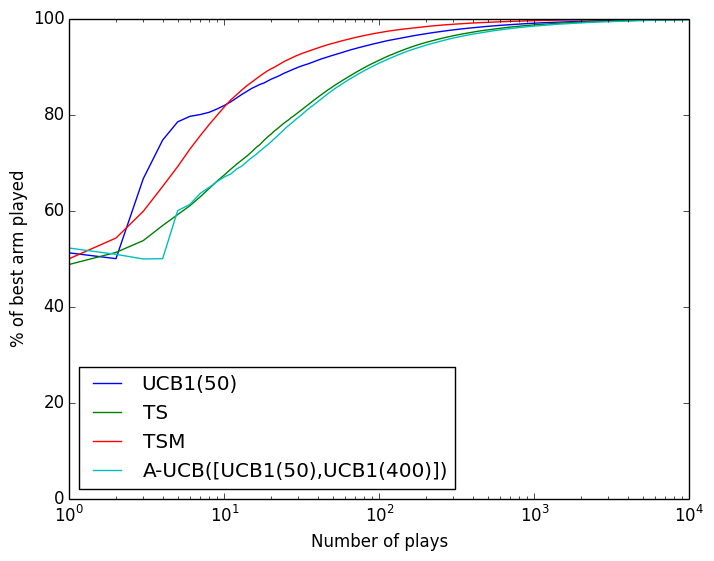

In [27]:
plotExpPolicy([RareDist(0., -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 50], Any[:UCB1, 400], Any[:TS], Any[:TSM, generateArmRewardModel], Any[:AUCB, [genUCBSubArm(50), genUCBSubArm(400)]]], N = 1000, bSave = true);

Arm 1: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: 0.1, -1000.0; 0.9, Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -127.0, -163.0

Best arm: 1



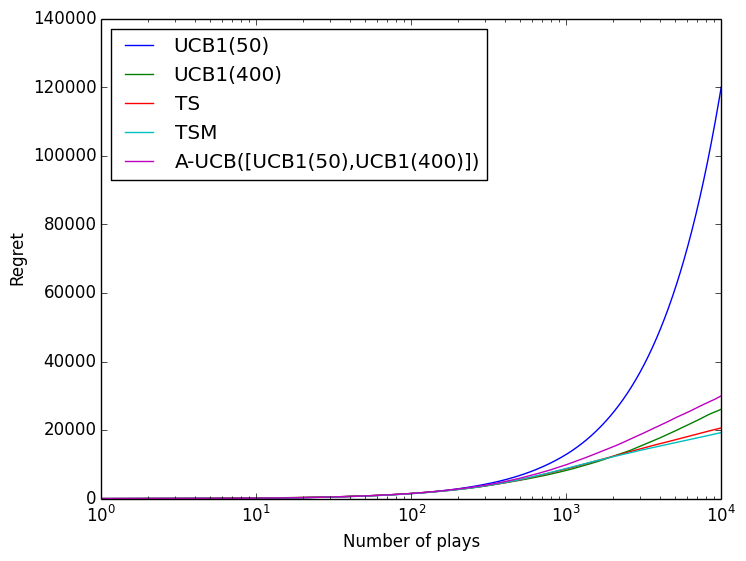

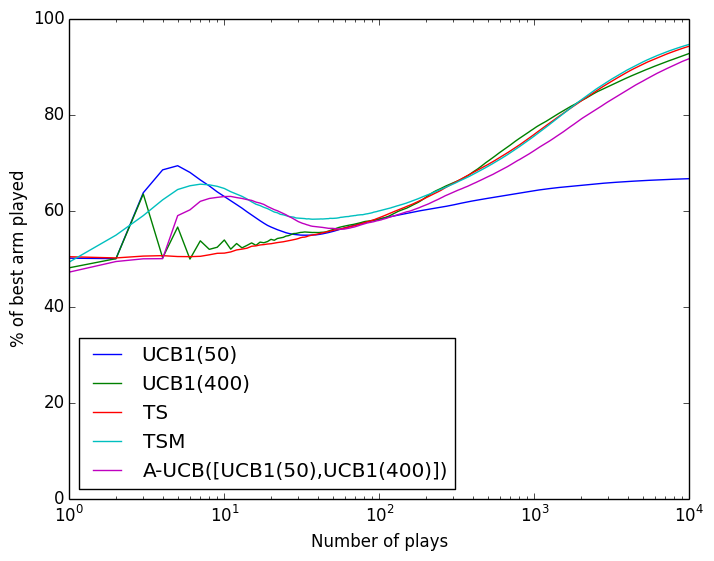

In [10]:
plotExpPolicy([RareDist(0.1, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0.1, -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 50], Any[:UCB1, 400], Any[:TS], Any[:TSM, generateArmRewardModel], Any[:AUCB, [genUCBSubArm(50), genUCBSubArm(400)]]], N = 1000, bSave = true);

Arm 1: 0.01, -1000.0; 0.99, Truncated(Distributions.Normal(μ=-30.0, σ=4.0), range=(-50.0, -10.0))
Arm 2: Truncated(Distributions.Normal(μ=-70.0, σ=10.0), range=(-120.0, -20.0))
mean of reward: -39.7, -70.0

Best arm: 1



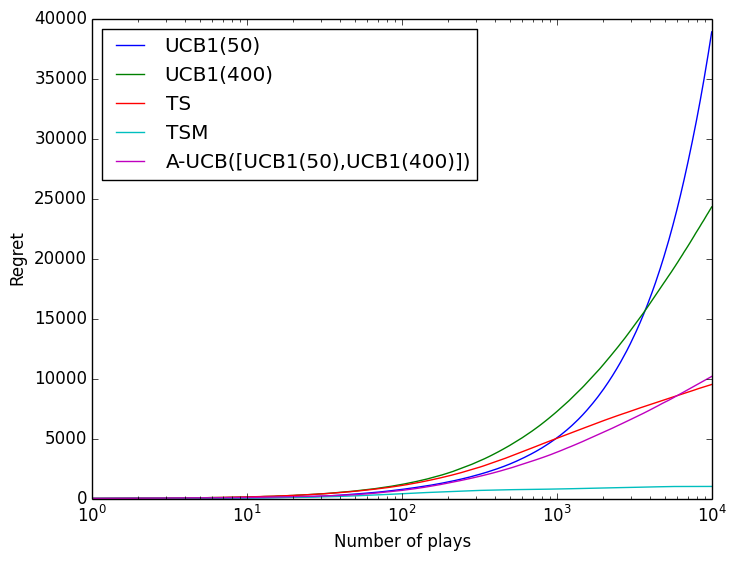

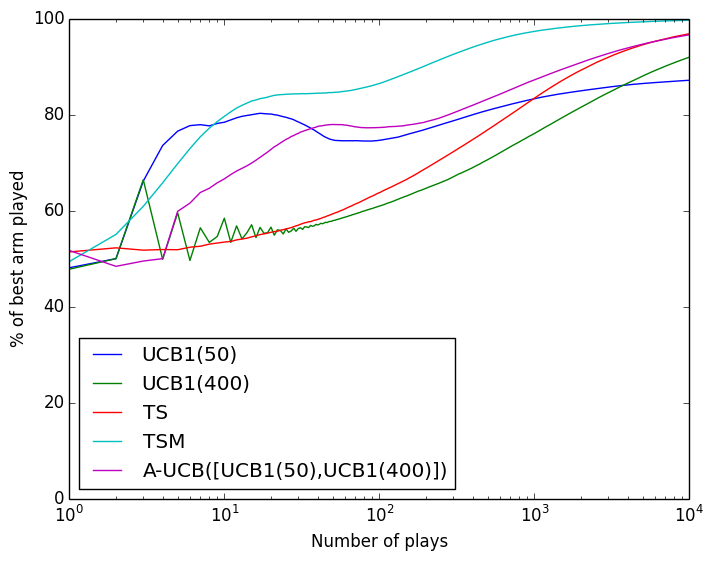

In [5]:
plotExpPolicy([RareDist(0.01, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))], Any[Any[:UCB1, 50], Any[:UCB1, 400], Any[:TS], Any[:TSM, generateArmRewardModel], Any[:AUCB, [genUCBSubArm(50), genUCBSubArm(400)]]], N = 1000, bSave = true);

In [12]:
function generateData(dataset::Int64, rewards; N::Int64 = 100, datadir::ASCIIString = ".")

    runExpN(rewards, Any[:UCB1, 50], savefile = "$datadir/regret" * string(dataset) * "a.jld", N = N)
    runExpN(rewards, Any[:UCB1, 400], savefile = "$datadir/regret" * string(dataset) * "b.jld", N = N)
    runExpN(rewards, Any[:AUCB, [genUCBSubArm(50), genUCBSubArm(400)]], bPlotSubArms = true, savefile = "regret" * string(dataset) * "c.jld", N = N)
end

function plotData(dataset::Int64; datadir::ASCIIString = ".")

    R_pol1 = load("$datadir/regret" * string(dataset) * "a.jld", "R")
    R_pol2 = load("$datadir/regret" * string(dataset) * "b.jld", "R")
    R_AUCB = load("$datadir/regret" * string(dataset) * "c.jld", "R")
    R_AUCB_pol1 = load("$datadir/regret" * string(dataset) * "c.jld", "R1")
    R_AUCB_pol2 = load("$datadir/regret" * string(dataset) * "c.jld", "R2")

    n = length(R_AUCB)

    semilogx(1:n, R_pol1, 1:n, R_pol2, 1:n, R_AUCB, 1:n, R_AUCB_pol1, "b--", 1:n, R_AUCB_pol2, "g--")
    
    legend(["UCB1(50)", "UCB(400)", "A-UCB", "A-UCB UCB1(50)", "A-UCB UCB1(400)"])

    xlabel("Number of plays")
    ylabel("Average regret")
end

;

In [13]:
rewards1 = [RareDist(0.01, -1000., Truncated(Normal(-30, 4), -50, -10)), RareDist(0., -1000., Truncated(Normal(-70, 10), -120, -20))]
generateData(1, rewards1, N = 1000);

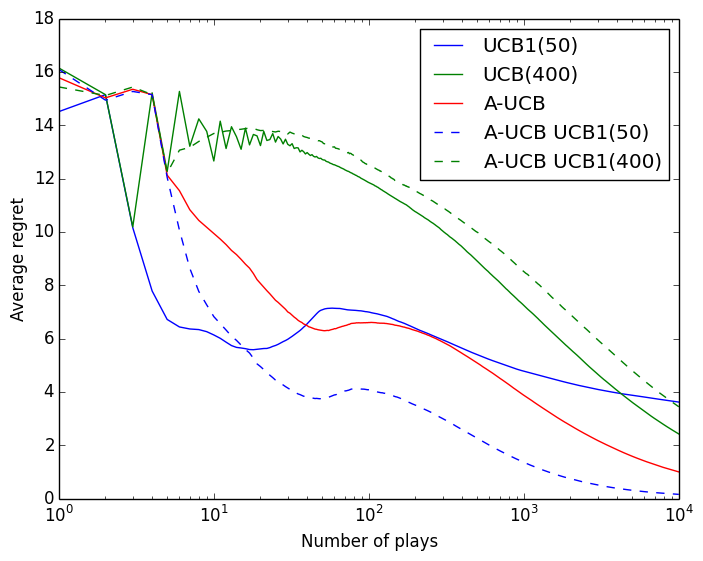

In [15]:
plotData(1, datadir = "data_ijcai");